In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2024-03-06 18:40:54--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 2607:f8b0:4023:c03::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  99.8MB/s    in 0.7s    

2024-03-06 18:40:55 (99.8 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import zipfile

local_zip = "./cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile( local_zip, "r")
zip_ref.extractall()

zip_ref.close()

In [ ]:
import os

base_dir = "cats_and_dogs_filtered"

print( f"Contents of base directory: { os.listdir( base_dir)}")

print( f"Contents of train directory: { os.listdir( f'{ base_dir}/train')}")
print( f"Contents of validation directory: { os.listdir( f'{ base_dir}/validation')}")

Contents of base directory: ['vectorize.py', 'validation', 'train']
Contents of train directory: ['dogs', 'cats']
Contents of validation directory: ['dogs', 'cats']


In [ ]:
train_dir = os.path.join( base_dir, "train")
validation_dir = os.path.join( base_dir, "validation")

train_cats_dir = os.path.join( train_dir, "cats")
train_dogs_dir = os.path.join( train_dir, "dogs")

validation_cats_dir = os.path.join( validation_dir, "cats")
validation_dogs_dir = os.path.join( validation_dir, "dogs")

In [ ]:
train_cats_fnames = os.listdir( train_cats_dir)
train_dogs_fnames = os.listdir( train_dogs_dir)

print( train_cats_fnames[ :10])
print( train_dogs_fnames[ :10])

['cat.238.jpg', 'cat.834.jpg', 'cat.92.jpg', 'cat.84.jpg', 'cat.395.jpg', 'cat.1.jpg', 'cat.672.jpg', 'cat.58.jpg', 'cat.29.jpg', 'cat.56.jpg']
['dog.298.jpg', 'dog.960.jpg', 'dog.701.jpg', 'dog.954.jpg', 'dog.396.jpg', 'dog.212.jpg', 'dog.63.jpg', 'dog.944.jpg', 'dog.545.jpg', 'dog.769.jpg']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

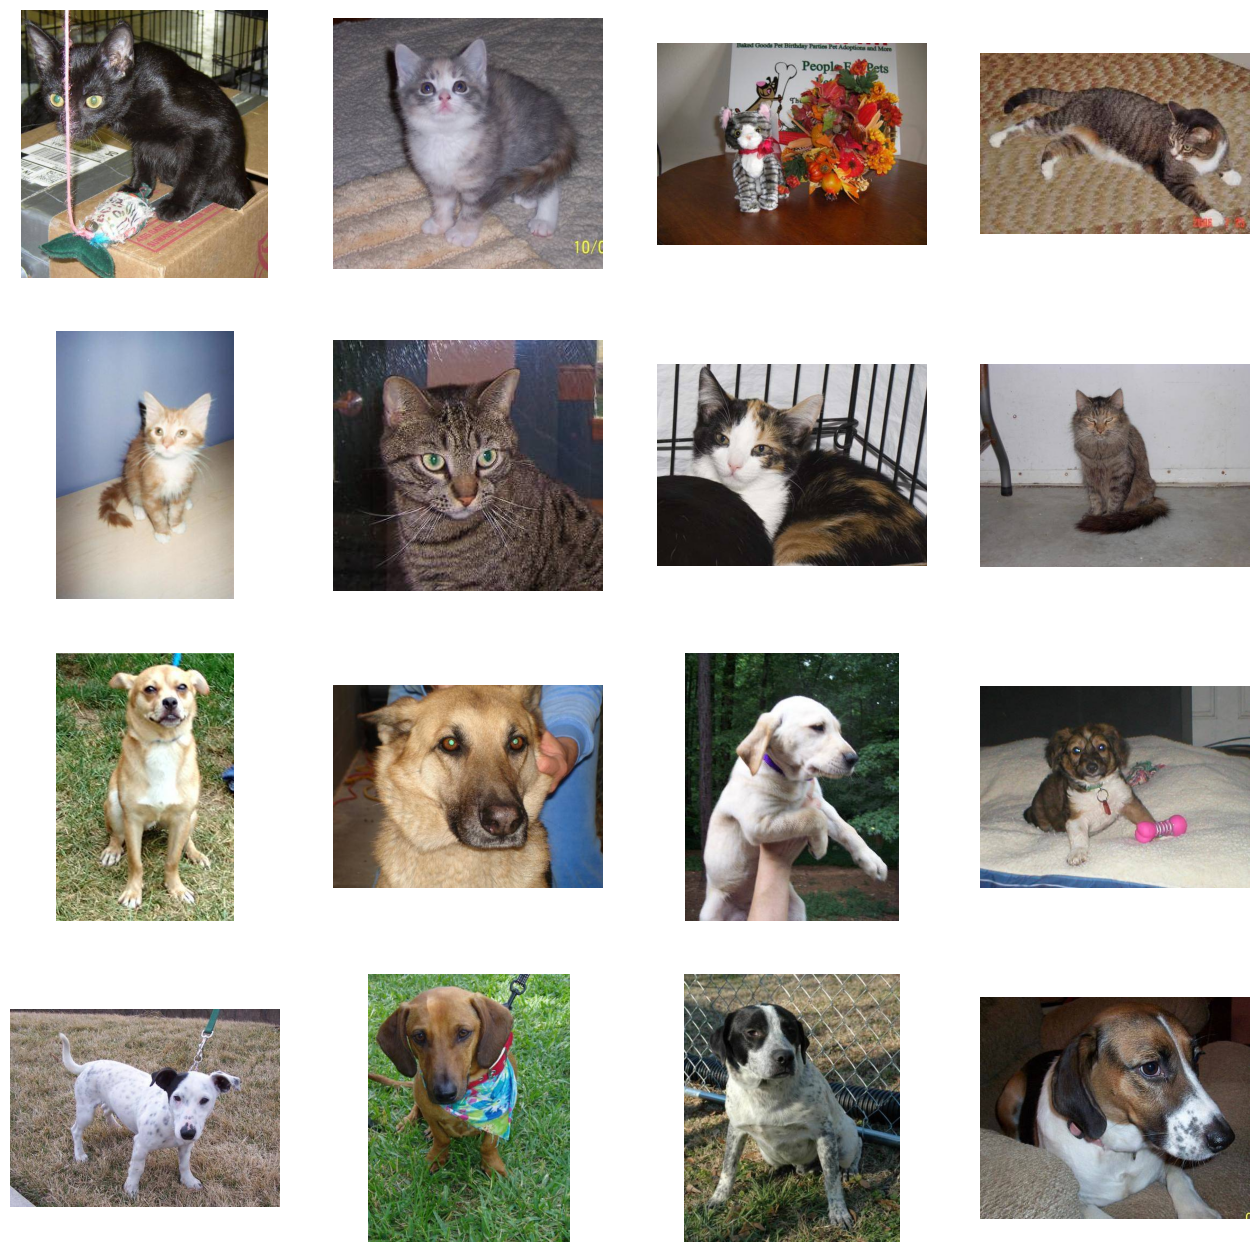

In [ ]:
fig = plt.gcf()
fig.set_size_inches( ncols * 4, nrows * 4)

pic_index += 8

next_cat_pix = [ os.path.join( train_cats_dir, fname) for fname in train_cats_fnames[ pic_index - 8: pic_index]]
next_dog_pix = [ os.path.join( train_dogs_dir, fname) for fname in train_dogs_fnames[ pic_index - 8: pic_index]]

for i, img_path in enumerate( next_cat_pix + next_dog_pix):
    sp = plt.subplot( nrows, ncols, i + 1)
    sp.axis( "off")

    img = mpimg.imread( img_path)

    plt.imshow( img)

plt.show()

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential( [
    tf.keras.layers.Conv2D( 16, ( 3, 3), activation="relu", input_shape=( 150, 150, 3)),
    tf.keras.layers.MaxPooling2D( 2, 2),
    tf.keras.layers.Conv2D( 32, ( 3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D( 2, 2),
    tf.keras.layers.Conv2D( 64, ( 3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D( 2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense( 512, activation="relu"),
    tf.keras.layers.Dense( 1, activation="sigmoid")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop( learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=[ "accuracy"]
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale=1.0/255.)
validation_datagen = ImageDataGenerator( rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode="binary",
    target_size=( 150, 150)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode="binary",
    target_size=( 150, 150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    verbose=2
)

Epoch 1/15
100/100 - 10s - loss: 0.7025 - accuracy: 0.5370 - val_loss: 0.6407 - val_accuracy: 0.6320 - 10s/epoch - 104ms/step
Epoch 2/15
100/100 - 6s - loss: 0.6404 - accuracy: 0.6425 - val_loss: 0.5987 - val_accuracy: 0.6630 - 6s/epoch - 57ms/step
Epoch 3/15
100/100 - 5s - loss: 0.5830 - accuracy: 0.6990 - val_loss: 0.5645 - val_accuracy: 0.6960 - 5s/epoch - 46ms/step
Epoch 4/15
100/100 - 5s - loss: 0.5301 - accuracy: 0.7410 - val_loss: 0.5839 - val_accuracy: 0.7020 - 5s/epoch - 47ms/step
Epoch 5/15
100/100 - 6s - loss: 0.4789 - accuracy: 0.7675 - val_loss: 0.6207 - val_accuracy: 0.6770 - 6s/epoch - 55ms/step
Epoch 6/15
100/100 - 5s - loss: 0.4229 - accuracy: 0.8060 - val_loss: 0.5666 - val_accuracy: 0.7260 - 5s/epoch - 46ms/step
Epoch 7/15
100/100 - 5s - loss: 0.3492 - accuracy: 0.8450 - val_loss: 0.9978 - val_accuracy: 0.6200 - 5s/epoch - 55ms/step
Epoch 8/15
100/100 - 5s - loss: 0.2908 - accuracy: 0.8740 - val_loss: 0.6649 - val_accuracy: 0.7380 - 5s/epoch - 47ms/step
Epoch 9/15
10

In [ ]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

    path = f"/content/{ fn}"
    img = load_img( path, target_size=( 150, 150))

    x = img_to_array( img)

    x /= 255

    x = np.expand_dims( x, axis=0)

    images = np.vstack( [ x])

    classes = model.predict( images, batch_size=10)

    print( classes[ 0])

    if classes[ 0] > 0.5:
        print( f"{ fn} is a dog")
    else:
        print( f"{ fn} is a cat")

Saving Aavaar.jpg to Aavaar.jpg
1/1 [==============================] - 0s 281ms/step
[0.0006907]
Aavaar.jpg is a cat


1/1 [==============================] - 0s 138ms/step


<ipython-input-20-b49b7d953ef2>:34: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
<ipython-input-20-b49b7d953ef2>:37: RuntimeWarning: invalid value encountered in cast
  x = np.clip( x, 0, 255).astype( "uint8")


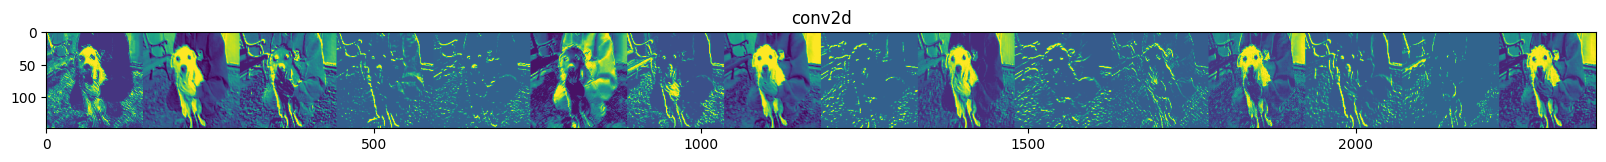

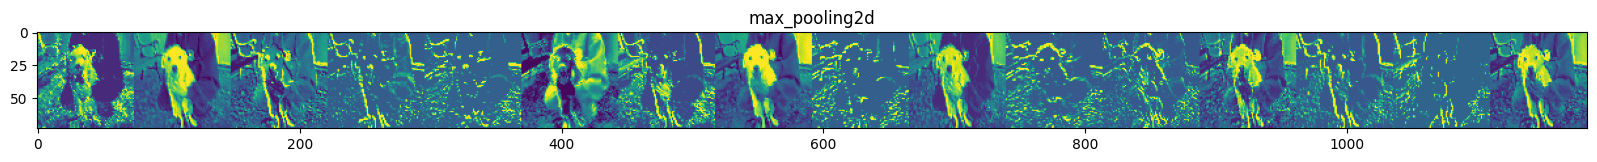

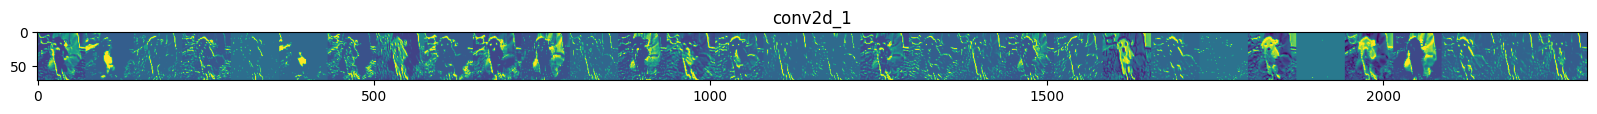

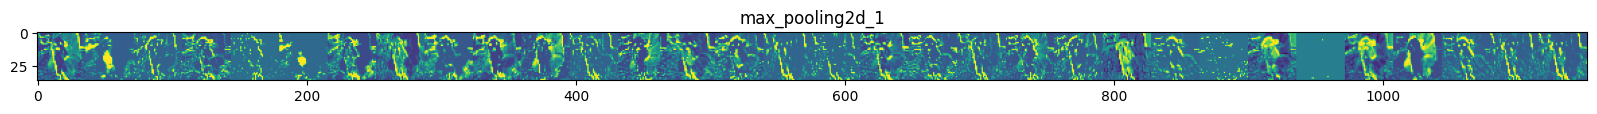

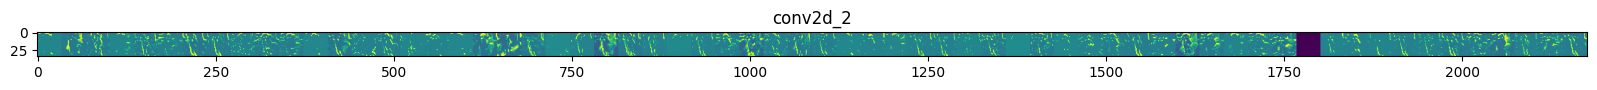

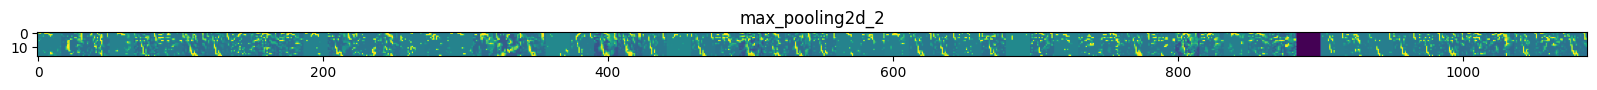

In [ ]:
import random

successive_output = [ layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model( inputs=model.input, outputs=successive_output)

cat_img_files = [ os.path.join( train_cats_dir, f) for f in train_cats_fnames]
dog_img_files = [ os.path.join( train_dogs_dir, f) for f in train_dogs_fnames]

img_path = random.choice( cat_img_files + dog_img_files)

img = load_img( img_path, target_size=( 150, 150))

x = img_to_array( img)
x = x.reshape( ( 1,) + x.shape)

x /= 255.0

successive_feature_maps = visualization_model.predict( x)

layer_names = [ layer.name for layer in model.layers]

for layer_name, feature_map in zip( layer_names, successive_feature_maps):

    if len( feature_map.shape) == 4:

        n_features = feature_map.shape[ -1]
        size = feature_map.shape[ 1]

        display_grid = np.zeros( ( size, size * n_features))

        for i in range( n_features):
            x = feature_map[ 0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip( x, 0, 255).astype( "uint8")

            display_grid[ :, i * size : ( i + 1) * size] = x

        scale = 20. / n_features
        plt.figure( figsize=( scale * n_features, scale))
        plt.title( layer_name)
        plt.grid( False)
        plt.imshow( display_grid, aspect="auto", cmap="viridis")

Text(0.5, 1.0, 'Training and Validation Loss')

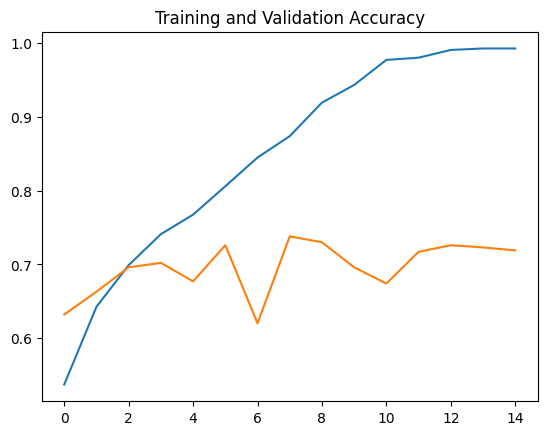

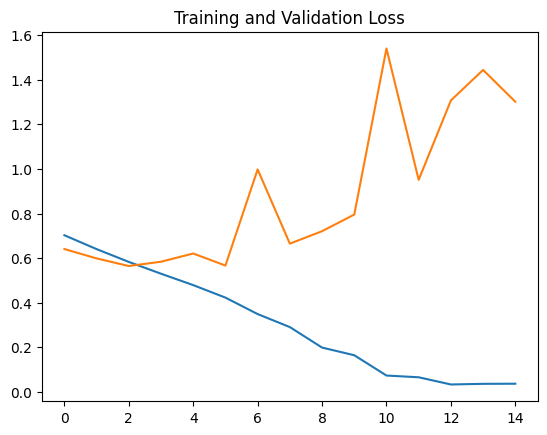

In [ ]:
acc = history.history[ "accuracy"]
val_acc = history.history[ "val_accuracy"]
loss = history.history[ "loss"]
val_loss = history.history[ "val_loss"]

epochs = range( len( acc))

plt.plot( epochs, acc)
plt.plot( epochs, val_acc)
plt.title( "Training and Validation Accuracy")
plt.figure()

plt.plot( epochs, loss)
plt.plot( epochs, val_loss)
plt.title( "Training and Validation Loss")